In [42]:
#preprocess - drop fields, calculate distance
#basic exploration of fields with decision tree

import sklearn.datasets as datasets
import pandas as pd
import numpy as np

train_data = pd.read_csv("orig/train.csv") #keeping orginal file intact
test_data = pd.read_csv("orig/test.csv")

#print(train_data)

target = train_data['label']

#print(target)

# df = train_data.iloc[:,1:-1]
# df=df.drop(['drop_time'], axis = 1) 
# df=df.drop(['pickup_time'], axis = 1) 
# #print(df)
# values = {'fare': -1, 'meter_waiting_fare': -1,
#           'meter_waiting': -1, 'additional_fare': -1,
#           'meter_waiting_till_pickup': -1, 'duration': -1}


df_train = train_data.iloc[:,1:]

df_train=df_train.drop(['drop_time'], axis = 1) 
df_train=df_train.drop(['pickup_time'], axis = 1) 
df_train=df_train.drop(['meter_waiting'], axis = 1) 

import geopy.distance
from geopy.distance import geodesic

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

df_train['distance'] = df_train.apply( lambda row:   float(    str(    round(    geodesic( (float(row.pick_lat) , float(row.pick_lon)),(float(row.drop_lat) , float(row.drop_lon))).kilometers, 1))), axis = 1) 
#df_train['distance'] = df_train.apply(lambda row: 1, axis = 1) 

df_train=df_train.drop(['pick_lat'], axis = 1) 
df_train=df_train.drop(['pick_lon'], axis = 1) 
df_train=df_train.drop(['drop_lat'], axis = 1) 
df_train=df_train.drop(['drop_lon'], axis = 1) 


#print(df)
values = {'fare': -1, 'meter_waiting_fare': -1,
          'additional_fare': -1,
          'meter_waiting_till_pickup': -1, 'duration': -1}


df_test = test_data.iloc[:,1:]
df_test=df_test.drop(['drop_time'], axis = 1) 
df_test=df_test.drop(['pickup_time'], axis = 1) 
df_test['distance'] = df_test.apply(
    lambda row:
    float(str(round(geodesic((row.pick_lat, row.pick_lon), (row.drop_lat , row.drop_lon)).kilometers, 1))), axis = 1) 
#df_test['distance'] = df_test.apply(lambda row: 1, axis = 1) 
print(type(df_test['distance'][1]))
df_test=df_test.drop(['pick_lon'], axis = 1) 
df_test=df_test.drop(['pick_lat'], axis = 1) 
df_test=df_test.drop(['drop_lat'], axis = 1) 
df_test=df_test.drop(['drop_lon'], axis = 1) 
df_test=df_test.drop(['meter_waiting'], axis = 1) 

#print(df)
values = {'fare': -1, 'meter_waiting_fare': -1,
          'additional_fare': -1,
          'meter_waiting_till_pickup': -1, 'duration': -1}

#data['column_name'] = number.fit_transform(data['column_name'])

df_train=df_train.fillna(value=values)
df_test=df_test.fillna(value=values)
# df_=df.fillna(value=values)

#df=train_data.loc[:, df.columns != 'Class']


columns_titles = ["additional_fare", "duration", "meter_waiting_fare",
                  "meter_waiting_till_pickup","distance", "fare","label"]
columns_titles_test = ["additional_fare", "duration", "meter_waiting_fare",
                  "meter_waiting_till_pickup","distance", "fare"]
df_train=df_train.reindex(columns=columns_titles)
df_test=df_test.reindex(columns=columns_titles_test)

# print(df.columns)
print(df_train.columns)
print(df_test.columns)

df_train['label'].replace(to_replace=['correct', 'incorrect'], value=[1,0], inplace=True)

#print(train_data.A1)
df_train.to_csv('train.csv', sep=',', encoding='utf-8')
df_test.to_csv('test.csv', sep=',', encoding='utf-8')



<class 'numpy.float64'>
Index(['additional_fare', 'duration', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'distance', 'fare', 'label'],
      dtype='object')
Index(['additional_fare', 'duration', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'distance', 'fare'],
      dtype='object')


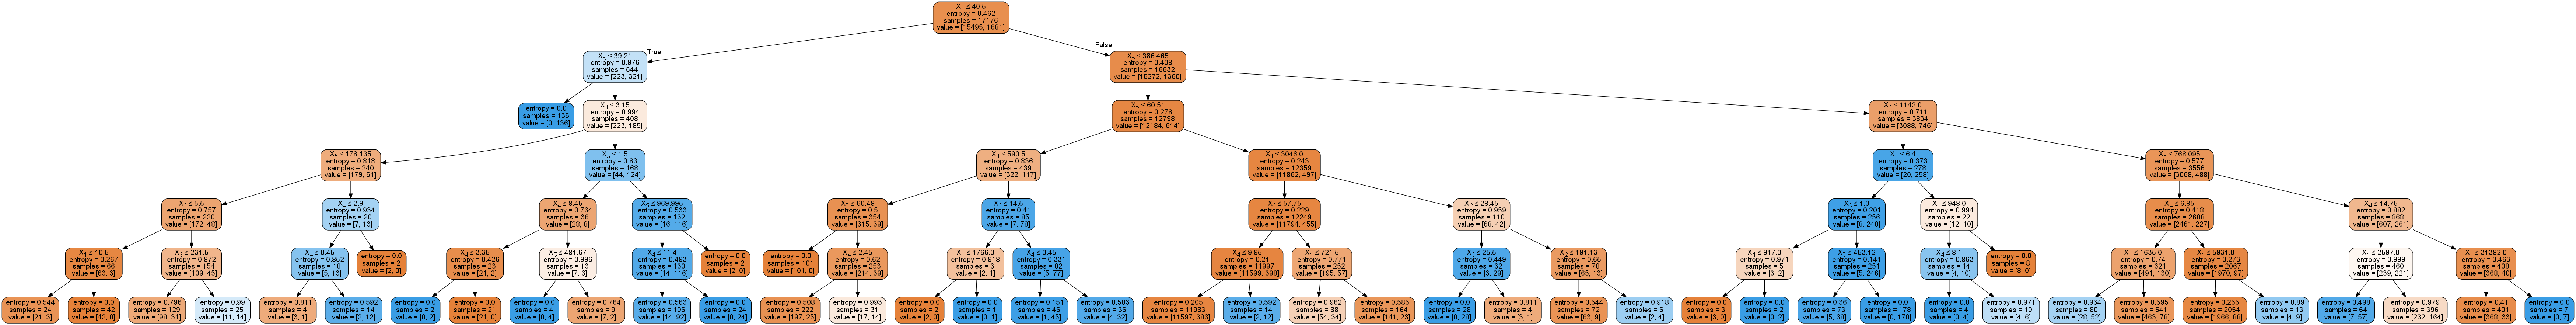

In [46]:

#df_train=df_train.drop(['label'], axis = 1) 



from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, criterion='entropy') #max_depth is maximum number of levels in the tree
dtree.fit(df_train, target)


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

